In [6]:
import sys
import os
  
# # getting the name of the directory
# # where the this file is present.
current = os.path.dirname(os.path.realpath("ResultAnalysis.ipynb"))
  
# # Getting the parent directory name
# # where the current directory is present.
parent = os.path.dirname(current)
  
# # adding the parent directory to 
# # the sys.path.
sys.path.append(parent)
#print(parent)

In [7]:
from sklearn.metrics import confusion_matrix
from graphsage.utils2 import load_cora, load_ppi, load_wikics, custom_load_pubmed
import numpy as np

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


### Cora

In [47]:
data_dic_cora = load_cora(lsh_helper={})

In [81]:
pred_dir = '/home/thummala/graphsage-pytorch/res/cora/lshaugment_20_20_na_2_10_false_2_save'
gs_dir = '/home/thummala/graphsage-pytorch/res/cora/graphsage_save'

In [82]:
y_pred_augment = np.load(pred_dir+'/predictions.npy')
y_pred_gs = np.load(gs_dir+'/predictions.npy')

In [84]:
def get_masks(dir_):
    test = np.load(dir_+'/test.npy')
    print(test)
    train = np.load(dir_+'/train.npy')
    val = np.load(dir_+'/val.npy')
    train_mask = []
    test_mask = []
    val_mask = []
    for i in range(2708):
        if i in train:
            train_mask.append(True)
            test_mask.append(False)
            val_mask.append(False)
        elif i in val:
            train_mask.append(False)
            test_mask.append(False)
            val_mask.append(True)
        else:
            train_mask.append(False)
            test_mask.append(True)
            val_mask.append(False)
    return train_mask,test_mask,val_mask

In [85]:
train_mask_gs, test_mask_gs, val_mask_gs = get_masks(gs_dir)
train_mask_augment, test_mask_augment, val_mask_augment = get_masks(pred_dir)

[ 996 1140 1145 ... 1347 1972 2384]
[ 996 1140 1145 ... 1347 1972 2384]


In [86]:
labels = np.array(data_dic_cora['labels'])
y_true_gs = labels[test_mask_gs]
y_true_augment = labels[test_mask_augment]

In [91]:
(y_true_gs == y_true_augment).all()

True

In [87]:
print(y_true_gs.shape,y_pred_gs.shape)

(1500, 1) (1500,)


In [88]:
confusion_matrix(y_true_gs,y_pred_gs)

array([[137,  26,  39,  59,  67,  70,  48],
       [ 25,   7,   6,  21,  18,  15,   9],
       [ 36,   3,   9,  14,  17,  20,  11],
       [ 81,  10,  23,  47,  31,  29,  32],
       [ 76,   9,  15,  22,  33,  36,  18],
       [ 66,  12,  20,  32,  31,  30,  26],
       [ 52,  11,  15,  23,  21,  18,  24]])

In [89]:
confusion_matrix(y_true_augment,y_pred_augment)

array([[145,  42,  34,  58,  73,  71,  23],
       [ 25,   8,   5,  21,  21,  15,   6],
       [ 35,   9,  11,  12,  18,  19,   6],
       [ 83,  15,  20,  39,  45,  32,  19],
       [ 74,  18,  12,  24,  31,  34,  16],
       [ 66,  20,  18,  32,  35,  33,  13],
       [ 50,  11,  17,  20,  30,  20,  16]])

In [93]:
pred_dir = '/home/thummala/graphsage-pytorch/res/cora/lshaugment_20_20_na_2_10_false_1_save'
train_mask_augment, test_mask_augment, val_mask_augment = get_masks(pred_dir)
y_pred_augment = np.load(pred_dir+'/predictions.npy')
confusion_matrix(y_true_augment,y_pred_augment)

[ 996 1140 1145 ... 1347 1972 2384]


array([[129,  29,  32,  68,  54,  81,  53],
       [ 26,   7,   5,  22,  15,  17,   9],
       [ 34,   3,  10,  15,  16,  21,  11],
       [ 74,  13,  22,  50,  28,  33,  33],
       [ 71,  11,  14,  26,  25,  38,  24],
       [ 64,  13,  18,  37,  29,  32,  24],
       [ 50,  10,  13,  26,  19,  18,  28]])

In [11]:
y_pred.shape

(1500,)

In [14]:
data_dic['test_mask']

[]

In [13]:
data_dic.keys()

dict_keys(['feat_data', 'labels', 'adj_lists', 'train_mask', 'test_mask', 'val_mask', 'distances', 'cluster_labels', 'freq', 'dist_in_graph', 'centralityev', 'centralitybtw', 'centralityh', 'centralityd', 'lsh_neighbour_list'])

In [79]:
np.random.seed(1)
rand_indices = np.random.permutation(2708)

In [80]:
rand_indices

array([ 996, 1140, 1145, ..., 1096,  235, 1061])

### WikiCS

In [104]:
data_dic = load_wikics(lsh_helper={})

Loading WikiCS
loading dataframe of
Loading normal random walks
loading khop neighbours


In [105]:
labels = np.array(data_dic['labels'])
y_test = labels[data_dic['test_mask']]

In [115]:
pred_dir = '/home/thummala/graphsage-pytorch/res/wikics/lshaugment_20_20_na_2_20_false_2'
gs_dir = '/home/thummala/graphsage-pytorch/res/wikics/graphsage'

In [107]:
y_pred = np.load(gs_dir+'/predictions.npy')

In [108]:
y_pred

array([2, 4, 4, ..., 4, 3, 2])

In [109]:
y_test

array([2, 4, 2, ..., 4, 3, 2])

In [110]:
confusion_matrix(y_test,y_pred)

array([[ 120,    7,    1,    0,    2,    1,    0,    1,    0,   15],
       [   5,  234,    6,    2,   32,    3,    6,    7,   11,   27],
       [   0,    9,  827,   63,   45,   28,   19,   21,    8,   56],
       [   2,    5,  117,  767,   13,   17,    8,   12,    0,   25],
       [   3,   13,   42,   15, 1085,   59,   25,   56,   19,   22],
       [   0,    2,   36,   10,   30,  278,    6,   13,   10,    5],
       [   0,    5,   41,    3,    9,    5,  134,    5,    2,    2],
       [   2,   17,   46,   26,   19,   34,    2,  263,   12,   11],
       [   5,    6,    9,    2,   17,   31,    0,   29,  137,   10],
       [  11,    4,   46,    7,    9,    5,    1,    7,   20,  602]])

In [111]:
y_pred_augmented = np.load(pred_dir + '/predictions.npy')
confusion_matrix(y_test,y_pred_augmented)

array([[ 103,   11,    2,    0,    7,    1,    0,    0,    1,   22],
       [   6,  236,    9,    1,   32,    6,    4,    8,   10,   21],
       [   0,    7,  816,   68,   46,   14,   27,   20,   10,   68],
       [   4,    6,  111,  765,   17,   12,   10,    5,    1,   35],
       [   3,   19,   43,   35, 1058,   55,   22,   54,   13,   37],
       [   0,    2,   36,   13,   29,  267,   10,   14,   11,    8],
       [   0,    3,   34,    3,    8,    2,  142,    5,    3,    6],
       [   3,   16,   47,   24,   22,   20,    3,  263,   12,   22],
       [   3,    4,    9,    1,   13,   27,    1,   36,  143,    9],
       [  18,    6,   35,    4,    2,    7,    0,    4,   17,  619]])

In [112]:
pred_dir = '/home/thummala/graphsage-pytorch/res/wikics/lshaugment_20_20_20_2_20_true_2'
y_pred_augmented = np.load(pred_dir + '/predictions.npy')
confusion_matrix(y_test,y_pred_augmented)

array([[ 104,    8,    2,    0,    6,    2,    0,    1,    0,   24],
       [   5,  216,   12,    4,   38,    5,    3,   10,   14,   26],
       [   0,   10,  810,   61,   58,   12,   35,   19,    6,   65],
       [   3,    4,  116,  758,   19,   15,   10,    6,    1,   34],
       [   1,   20,   54,   35, 1038,   72,   17,   52,   22,   28],
       [   0,    1,   34,   11,   35,  266,   10,   16,    9,    8],
       [   0,    2,   51,    3,   13,    3,  116,    6,    3,    9],
       [   4,   15,   49,   28,   27,   26,    1,  250,   13,   19],
       [   1,    5,    8,    4,   16,   29,    1,   33,  140,    9],
       [  17,    8,   50,    7,    3,    4,    0,    1,   23,  599]])

In [113]:
feat_data = np.array(data_dic['feat_data'])
test_feat_data = feat_data[data_dic['test_mask']]

In [97]:
from sklearn.manifold import TSNE
test_feat_data_tsne = TSNE(random_state=0).fit_transform(test_feat_data)

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

#     # We add the labels for each cluster.
#     txts = []
#     for i in range(10):
#         # Position of each label.
#         xtext, ytext = np.median(x[colors == i, :], axis=0)
#         txt = ax.text(xtext, ytext, str(i), fontsize=50)
#         txt.set_path_effects([
#             PathEffects.Stroke(linewidth=5, foreground="w"),
#             PathEffects.Normal()])
#         txts.append(txt)

    return f, ax, sc

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f85ca4f58d0>)

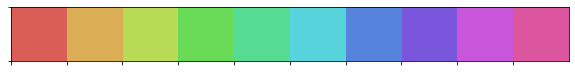

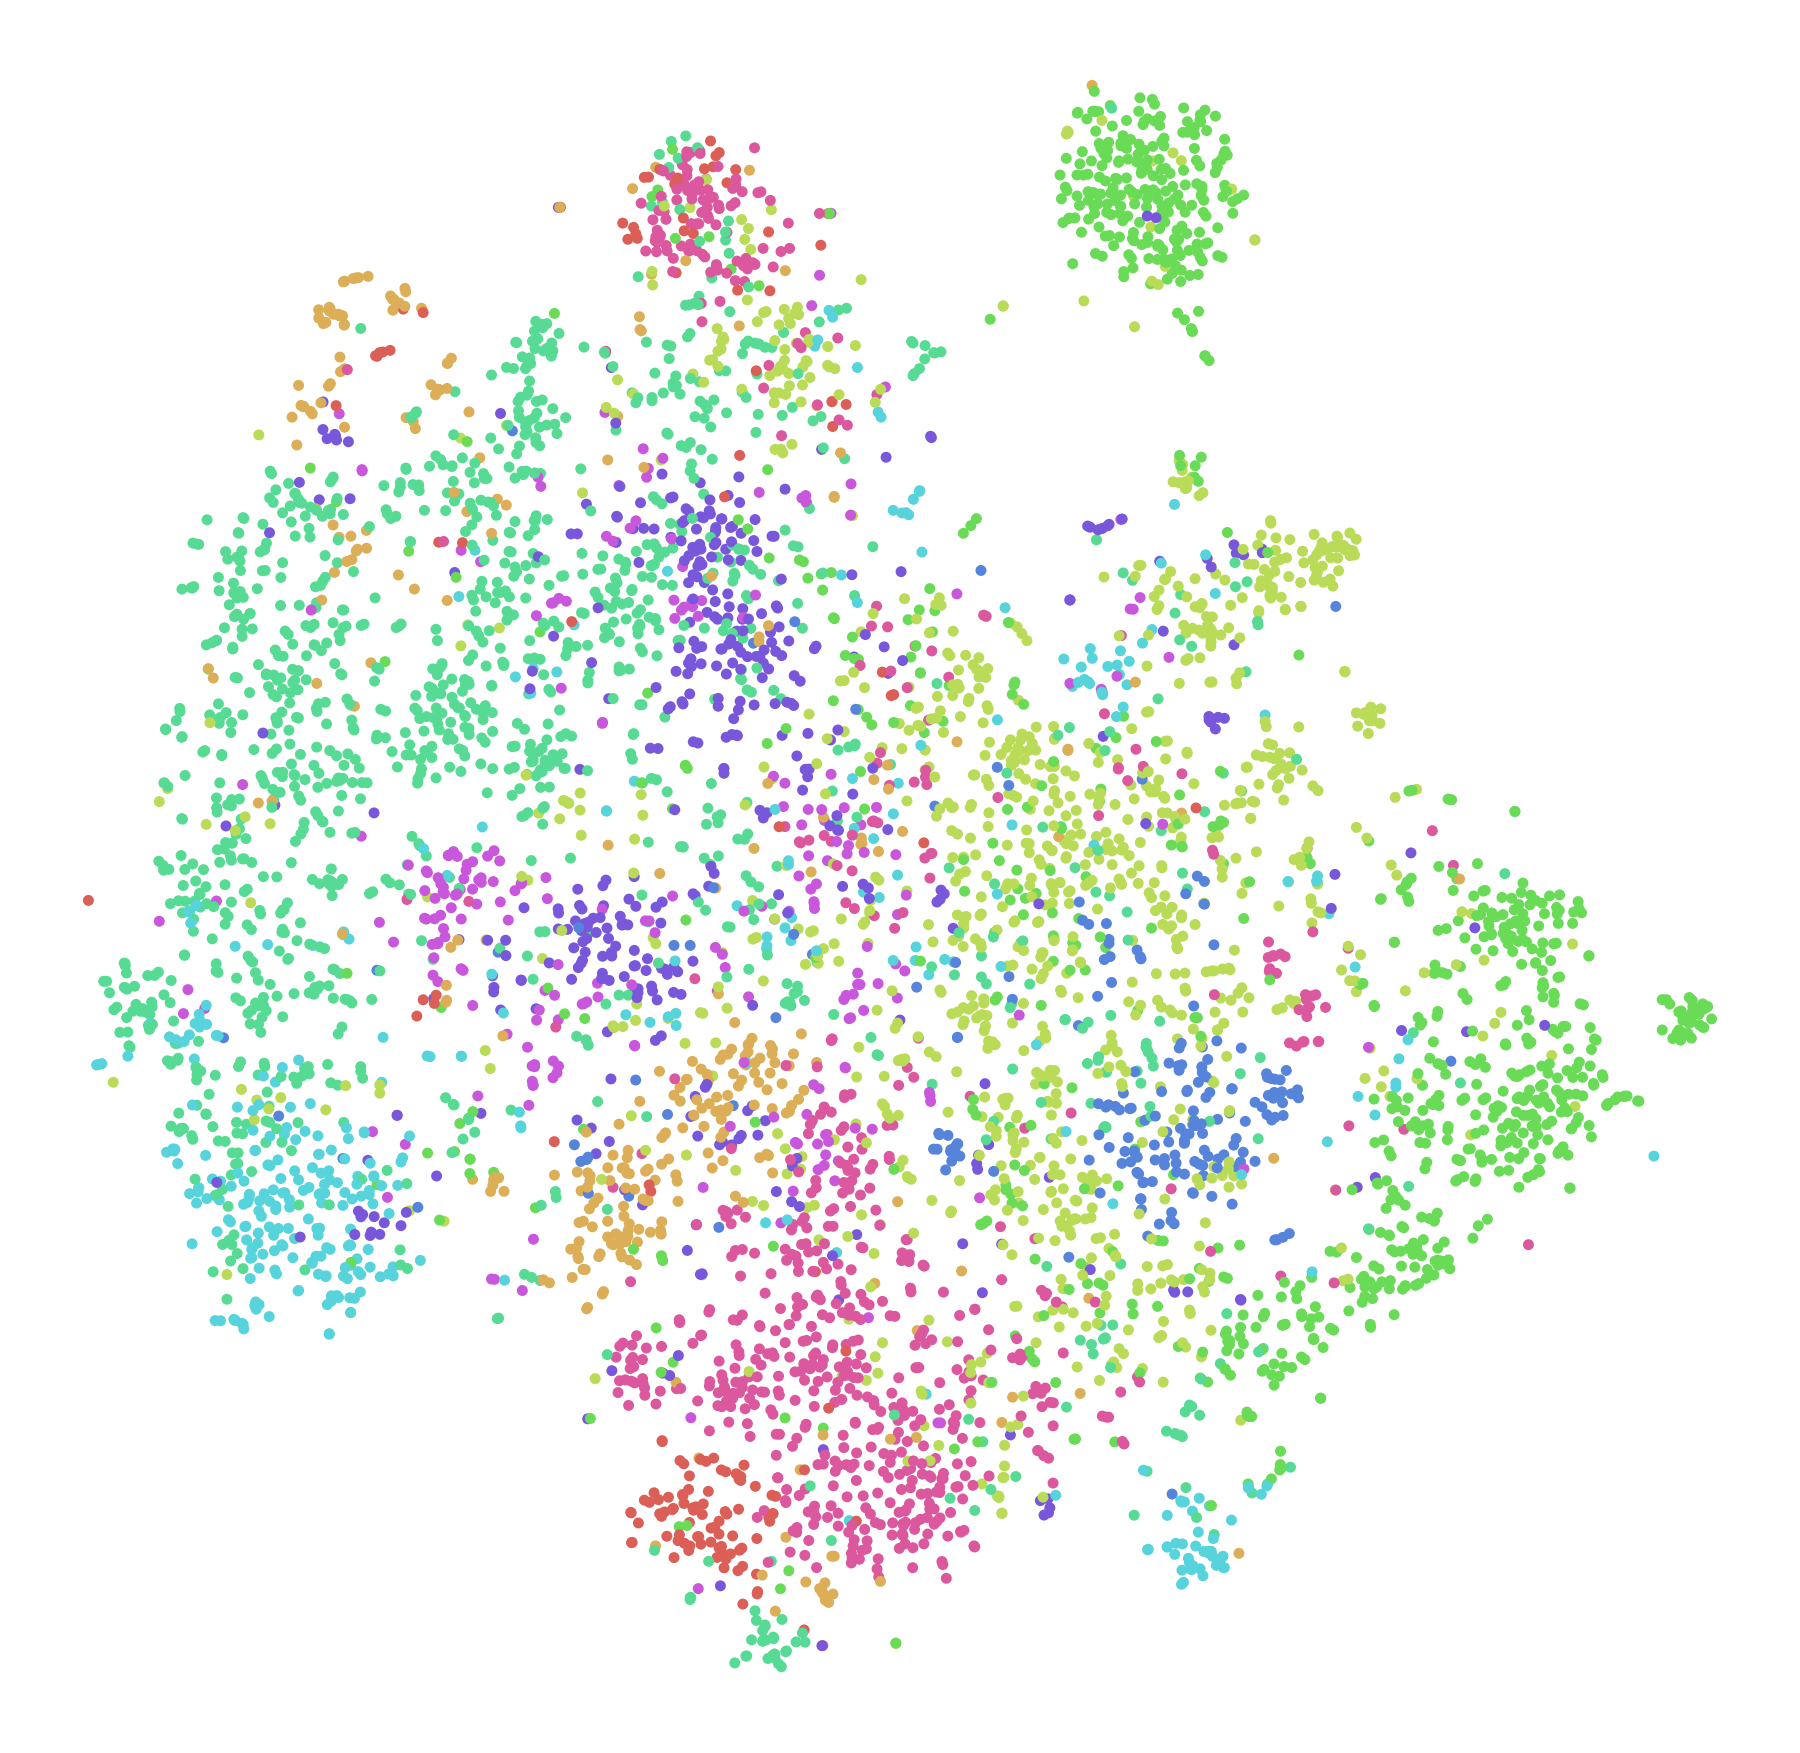

In [122]:
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(test_feat_data_tsne, y_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f85c9f01358>)

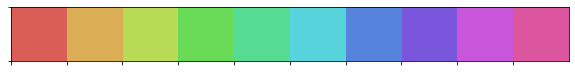

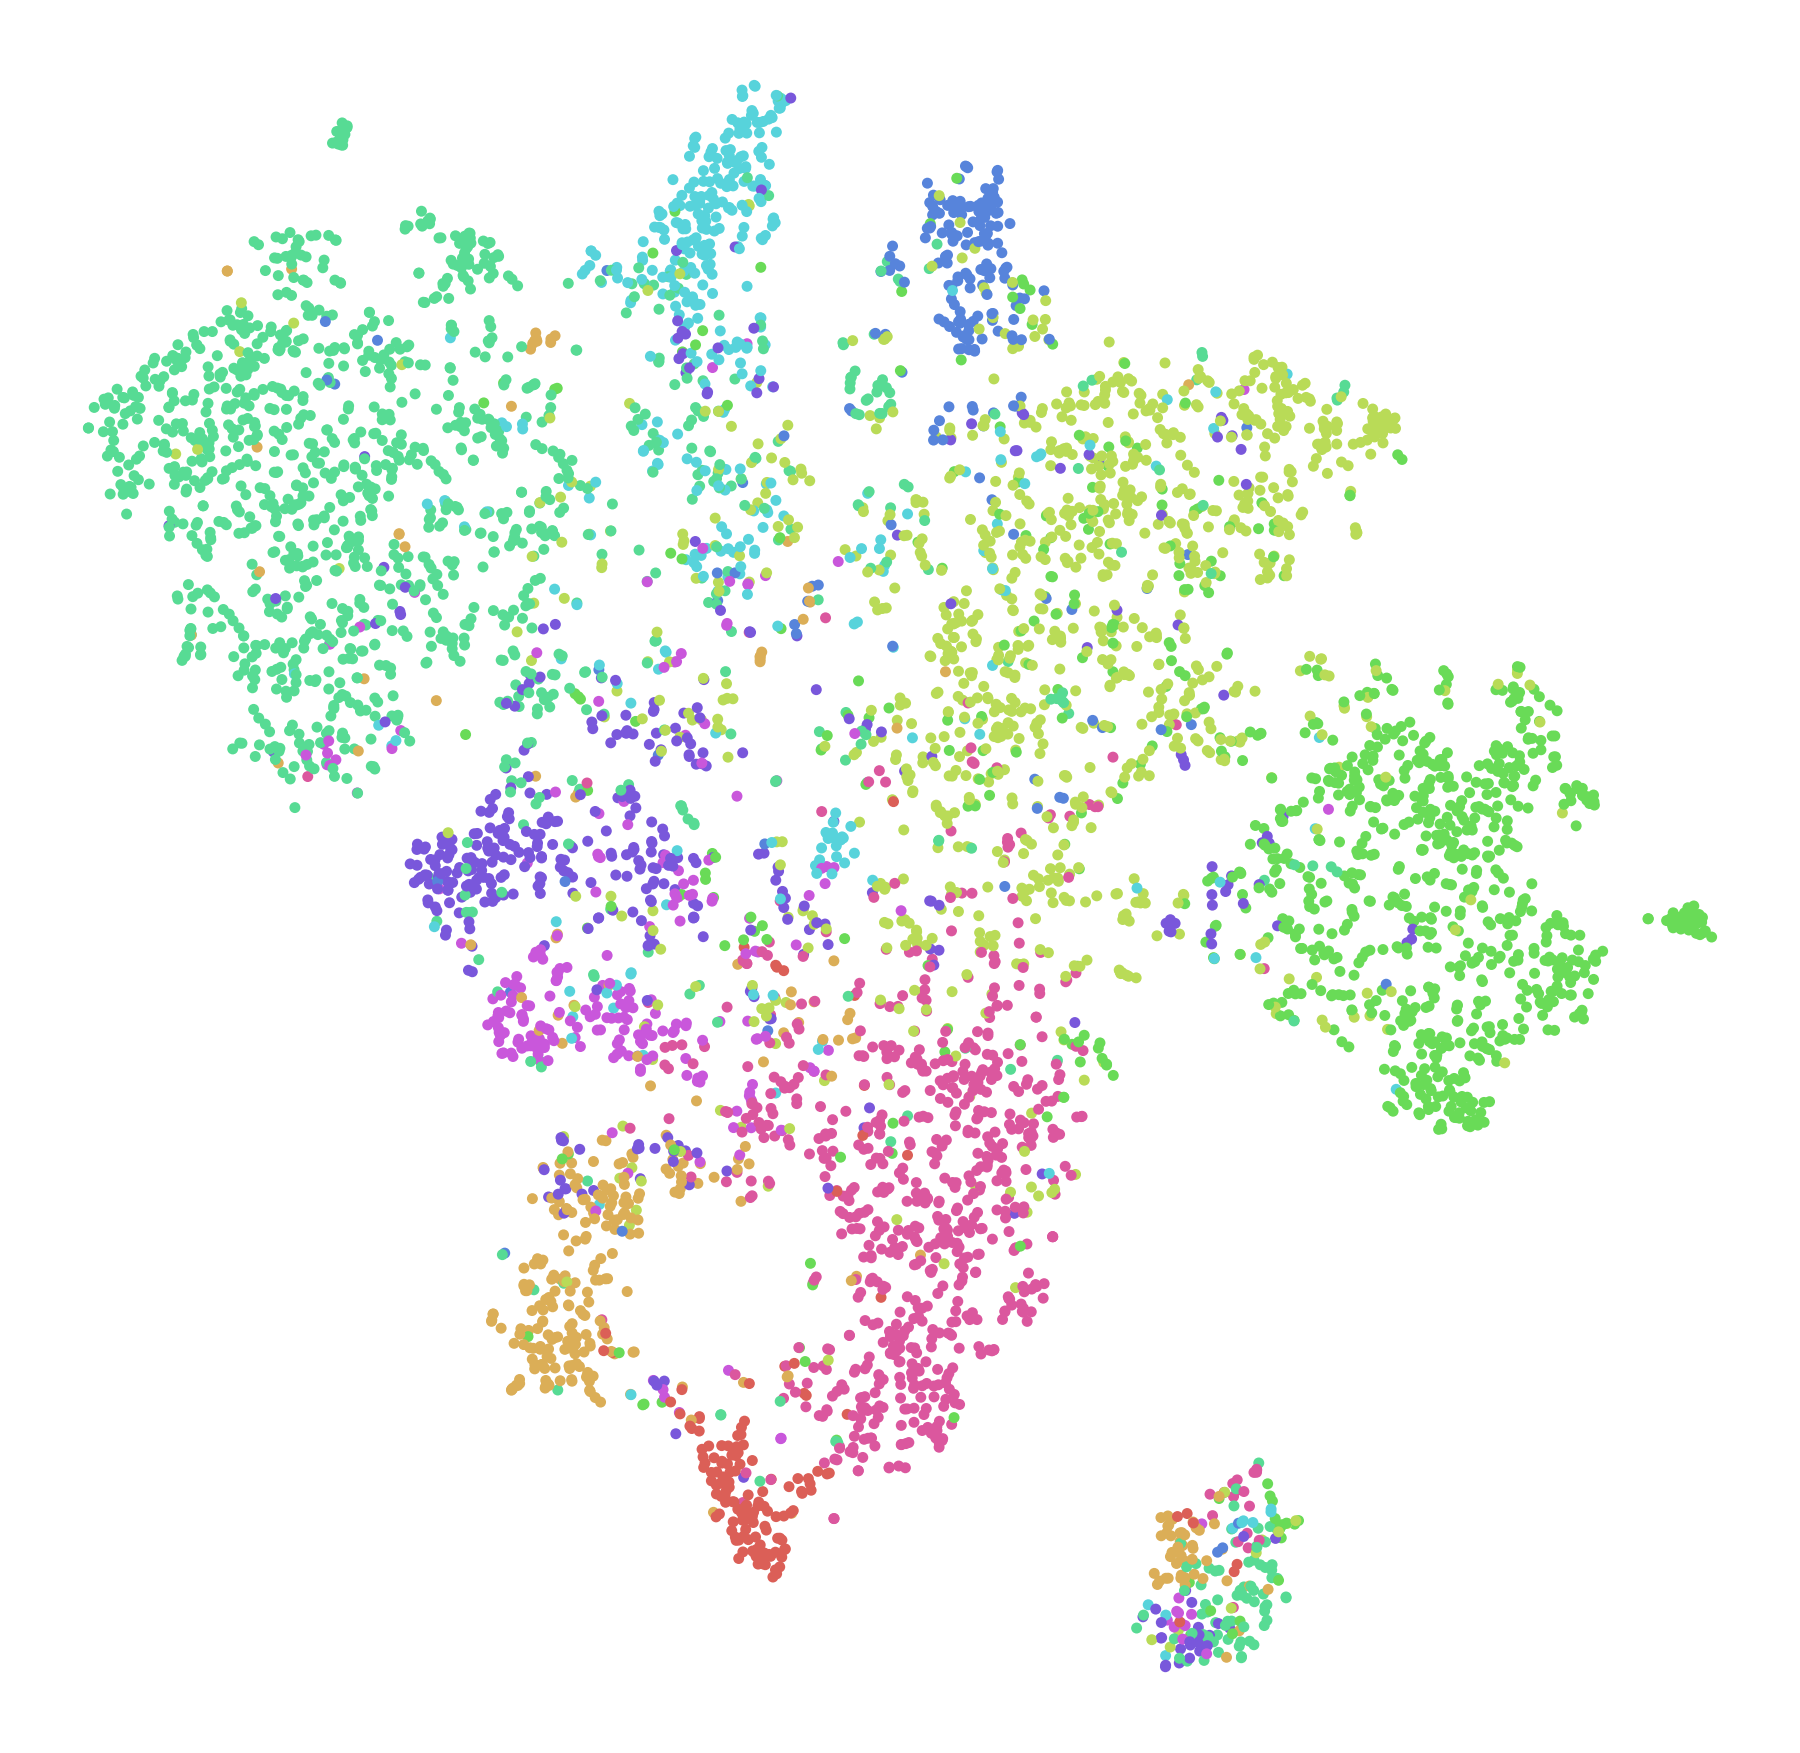

In [114]:
gs_embedding = np.load(gs_dir+'/embeddings.npy')
wikics_gs_tsne =  TSNE(random_state=0).fit_transform(gs_embedding)
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(wikics_gs_tsne, y_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f85ca6a3b38>)

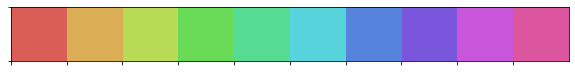

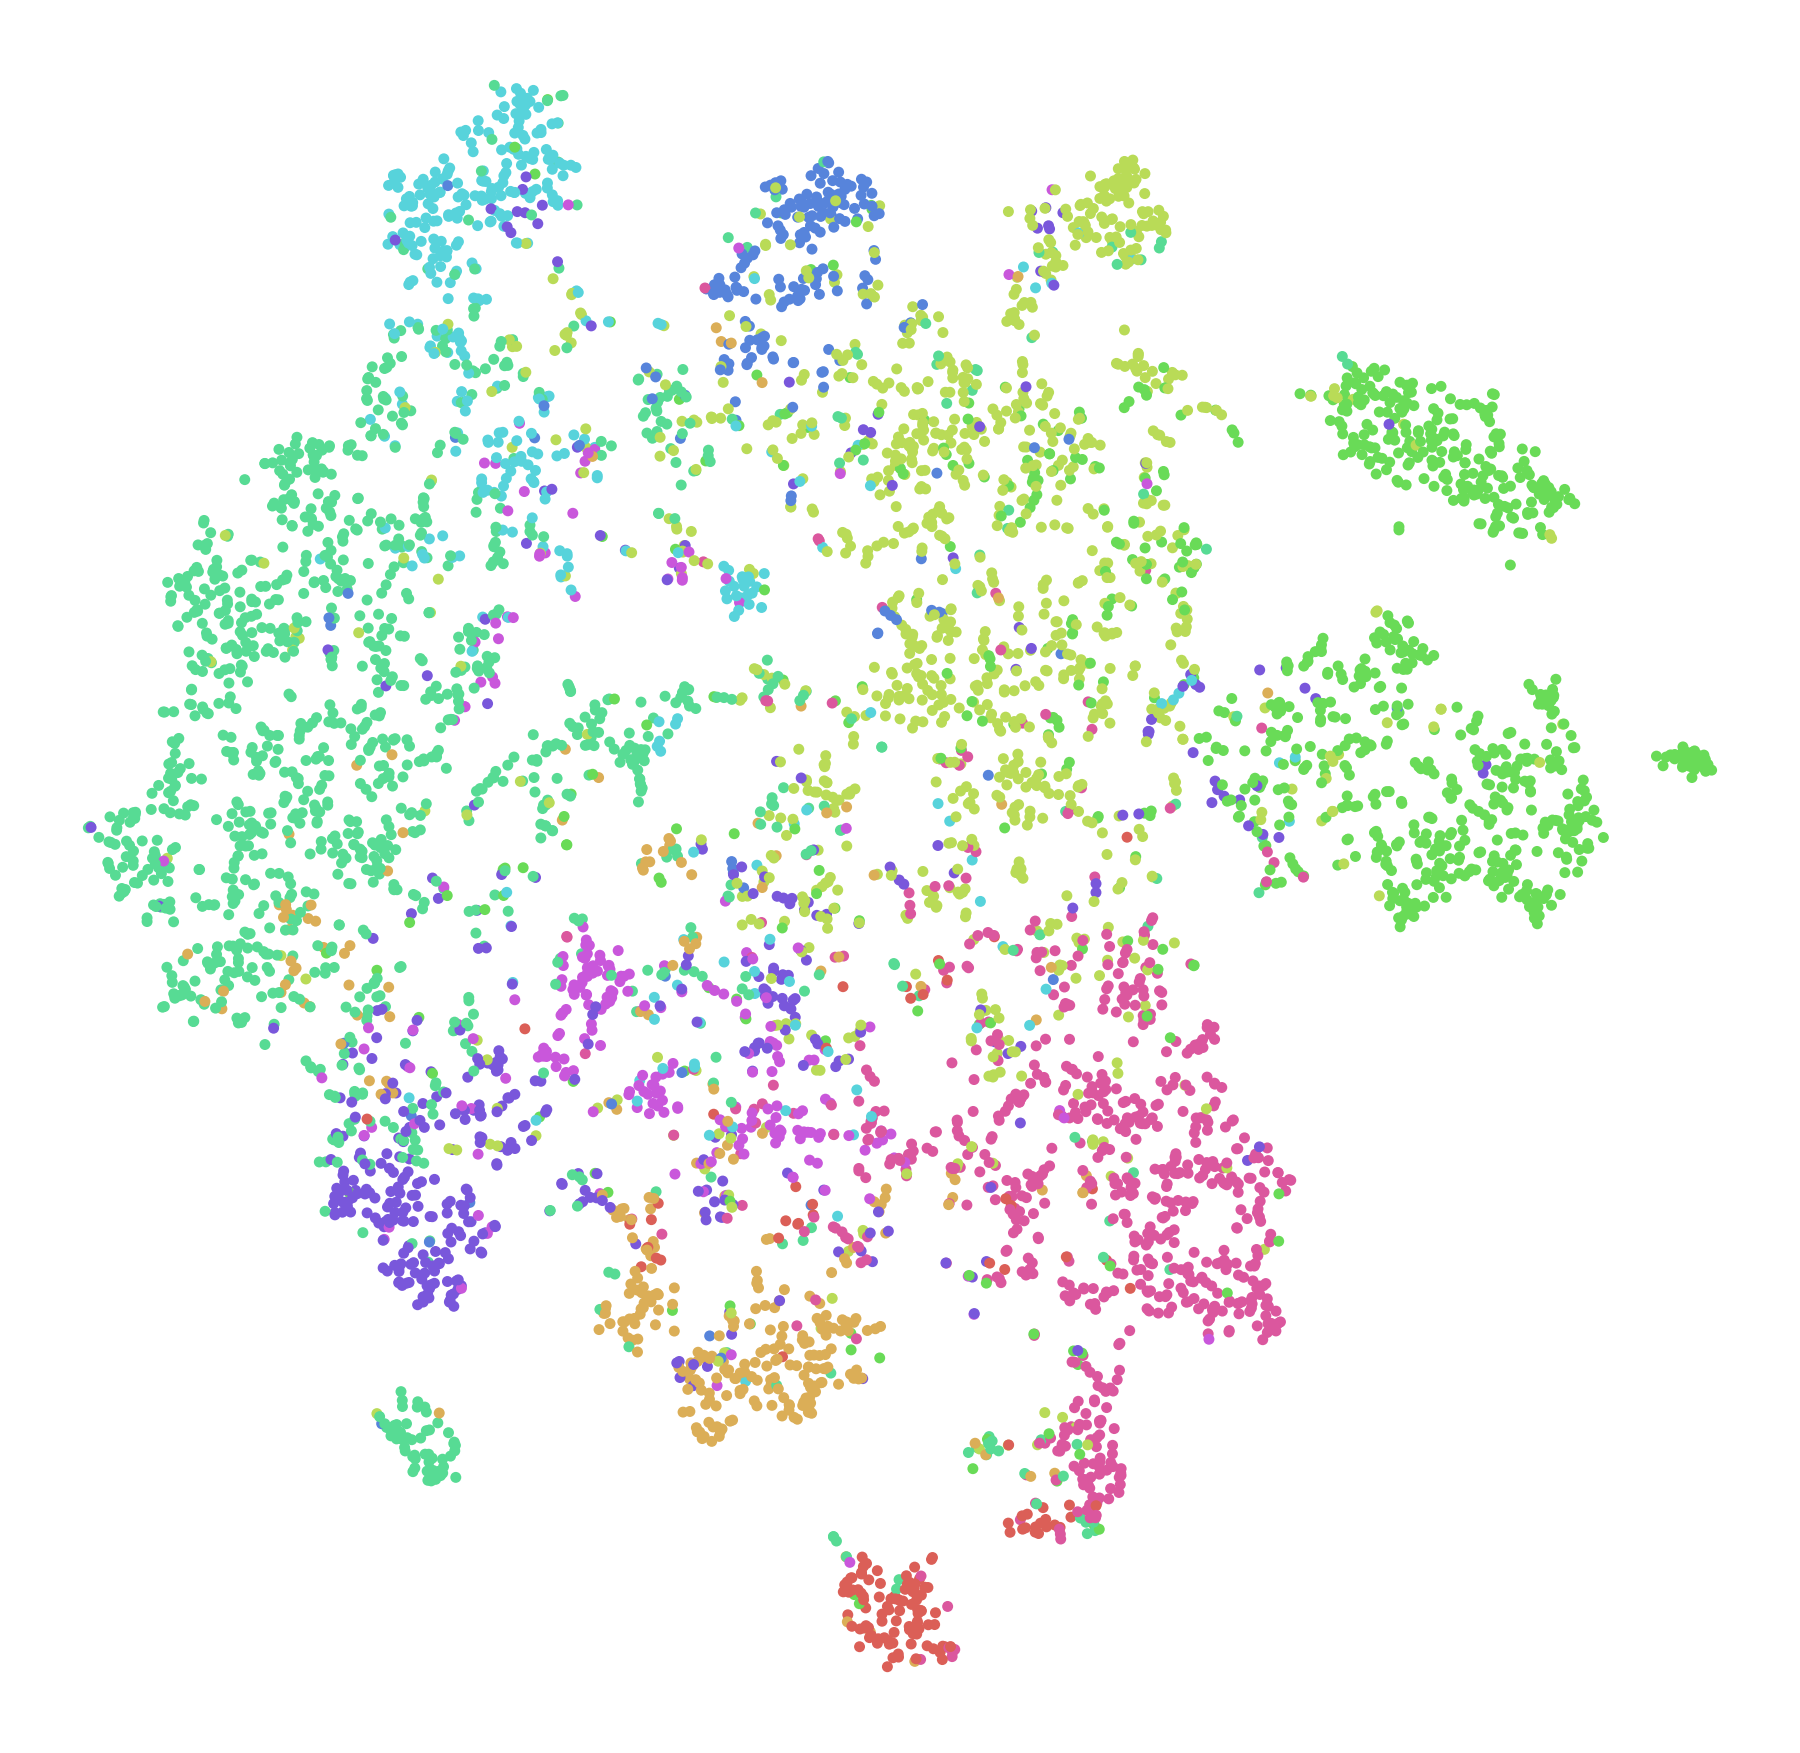

In [116]:
augmented_embedding = np.load(pred_dir+'/embeddings.npy')
wikics_augmented_tsne =  TSNE(random_state=0).fit_transform(augmented_embedding)
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(wikics_augmented_tsne, y_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


(<Figure size 2304x2304 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.collections.PathCollection at 0x7f85ca1e4128>)

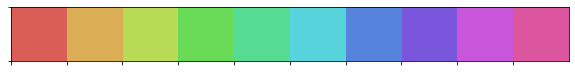

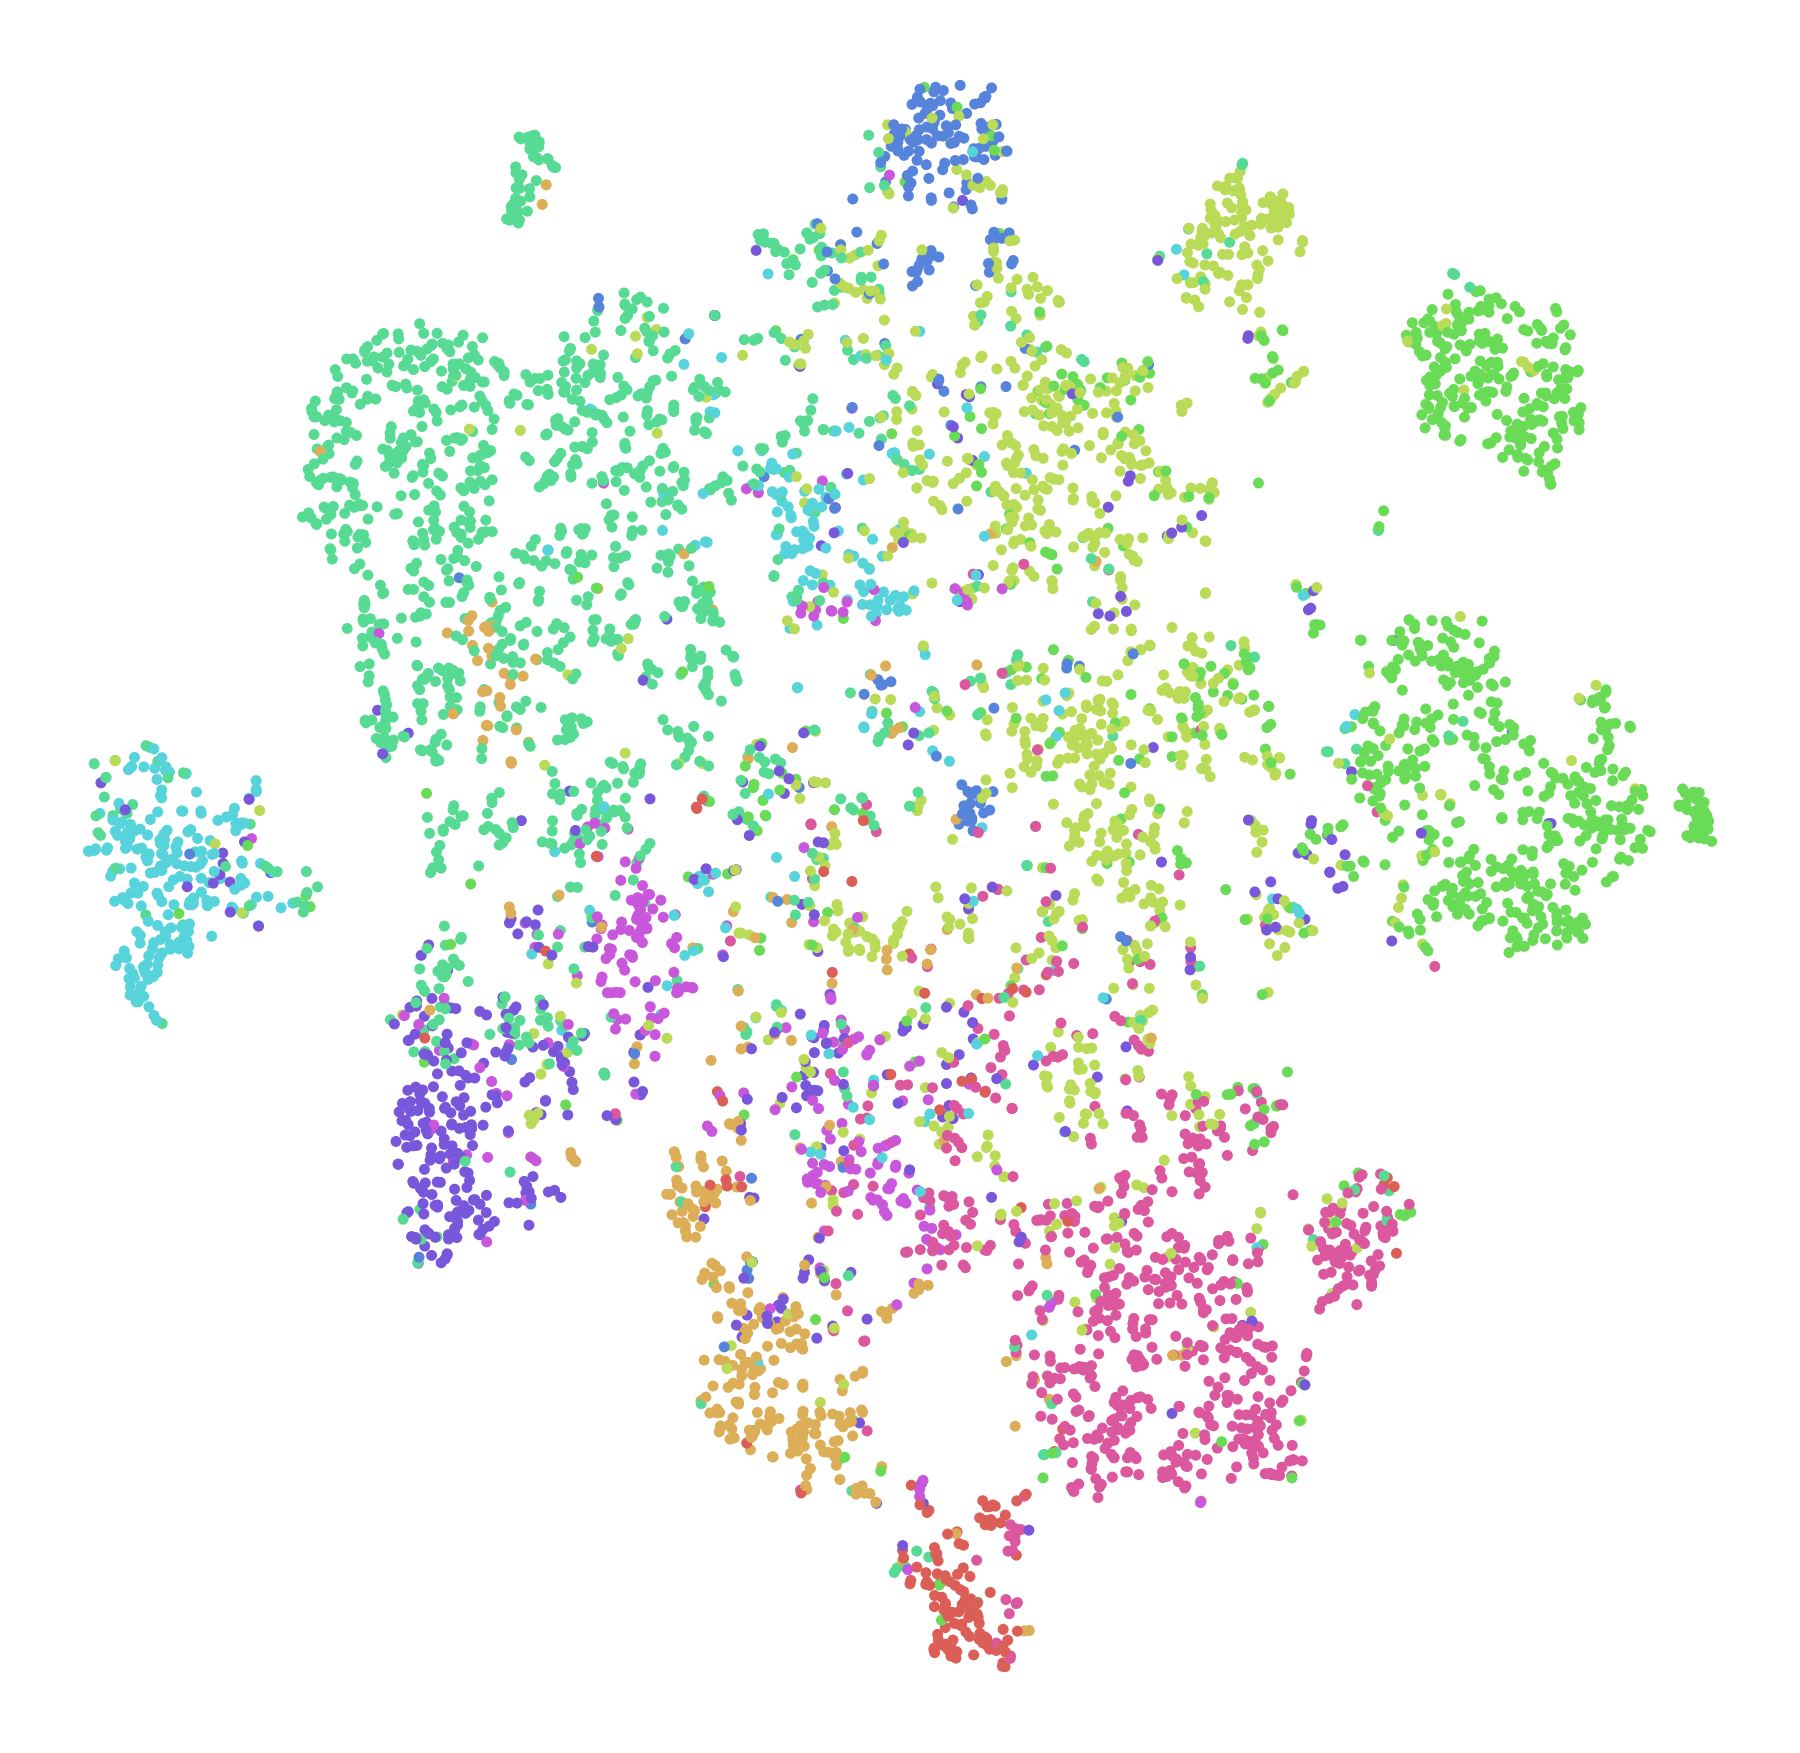

In [123]:
pred_dir = '/home/thummala/graphsage-pytorch/res/wikics/lshaugment_20_20_30_2_30_true_2'
augmented_embedding = np.load(pred_dir+'/embeddings.npy')
wikics_augmented_tsne =  TSNE(random_state=0).fit_transform(augmented_embedding)
print(list(range(0,10)))
sns.palplot(np.array(sns.color_palette("hls", 10)))
scatter(wikics_augmented_tsne, y_test)